In [1]:
import os
from pprint import pprint
from tqdm import tqdm
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# create a Resources/temp/original in current directory
files = os.listdir("Resources/temp/original")
files

['8863', '8864']

In [4]:
base_path = 'Resources/temp/original/'
patient_ids = os.listdir(base_path)
patient_ids

['8863', '8864']

In [5]:
class_0_total = 0
class_1_total = 0

In [7]:
for patient_id in patient_ids:
    class_0_files = os.listdir(base_path + patient_id + '/0')
    class_1_files = os.listdir(base_path + patient_id + '/1')

    class_0_total += len(class_0_files)
    class_1_total += len(class_1_files) 

total_images = class_0_total + class_1_total
    
print(f'Number of patches in Class 0: {class_0_total}')
print(f'Number of patches in Class 1: {class_1_total}')
print(f'Total number of patches: {total_images}')

Number of patches in Class 0: 1577
Number of patches in Class 1: 535
Total number of patches: 2112


In [8]:
columns = ["patient_id",'x','y',"target","path"]
data_rows = []
i = 0
iss = 0
isss = 0

In [10]:
for patient_id in tqdm(patient_ids):
    for c in [0,1]:
        
        class_path = base_path + patient_id + '/' + str(c) + '/'
        # print(class_path)
        imgs = os.listdir(class_path)
        
        # Extracting Image Paths
        img_paths = [class_path + img + '/' for img in imgs]
        # print(img_paths)

        img_coords = [img.split('_',4)[2:4] for img in imgs]
        x_coords = [int(coords[0][1:]) for coords in img_coords]
        y_coords = [int(coords[1][1:]) for coords in img_coords]

        for (path,x,y) in zip(img_paths,x_coords,y_coords):
            values = [patient_id,x,y,c,path]
            data_rows.append({k:v for (k,v) in zip(columns,values)})

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 52.15it/s]


In [12]:
data = pd.DataFrame(data_rows)
data

,patient_id,x,y,target,path
0,8863,1001,1001,0,Resources/temp/original/8863/0/8863_idx5_x1001...
1,8863,1001,1051,0,Resources/temp/original/8863/0/8863_idx5_x1001...
2,8863,1001,1101,0,Resources/temp/original/8863/0/8863_idx5_x1001...
3,8863,1001,1151,0,Resources/temp/original/8863/0/8863_idx5_x1001...
4,8863,1001,1201,0,Resources/temp/original/8863/0/8863_idx5_x1001...
...,...,...,...,...,...
4219,8864,2501,2551,1,Resources/temp/original/8864/1/8864_idx5_x2501...
4220,8864,2501,2601,1,Resources/temp/original/8864/1/8864_idx5_x2501...
4221,8864,2501,2651,1,Resources/temp/original/8864/1/8864_idx5_x2501...
4222,8864,2501,2701,1,Resources/temp/original/8864/1/8864_idx5_x2501...


In [13]:
data.shape

(4224, 5)

In [14]:
data.patient_id.value_counts()

8864    2266
8863    1958
Name: patient_id, dtype: int64

In [15]:
target_count = data.groupby('patient_id').target.value_counts()
target_count

patient_id  target
8863        0         1544
            1          414
8864        0         1610
            1          656
Name: target, dtype: int64

In [17]:
target_size = data.groupby('patient_id').target.size()
target_size

patient_id
8863    1958
8864    2266
Name: target, dtype: int64

In [29]:
pids = data.patient_id.unique()
pids

array(['8863', '8864'], dtype=object)

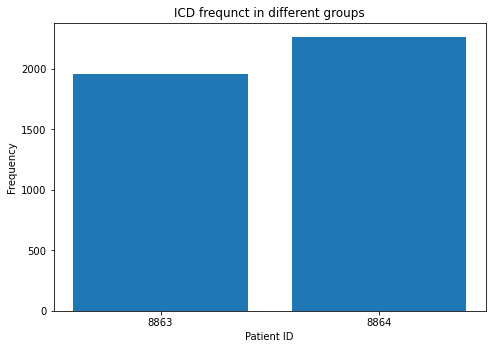

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('ICD frequnct in different groups')
ax.set_ylabel('Frequency')
ax.set_xlabel('Patient ID')
ax.bar(pids,  data.groupby('patient_id').target.size())
plt.show()

In [26]:
icd = [0,1]
icd

[0, 1]

In [35]:

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.set_title('ICD per class')
# ax.set_ylabel('Frequency')
# ax.set_xlabel('ICD or No ICD')
# ax.bar(icd, target_count.loc[:, 1])
# # ax.bar(target_count.loc[:, 1])
# plt.show()

In [39]:
target_class = data.target.unique()
target_class

array([0, 1], dtype=int64)

In [63]:
target_count

patient_id  target
8863        0         1544
            1          414
8864        0         1610
            1          656
Name: target, dtype: int64

In [41]:
target_count.loc[:, 1]

patient_id
8863    414
8864    656
Name: target, dtype: int64

In [42]:
target_count.loc[:, 0]

patient_id
8863    1544
8864    1610
Name: target, dtype: int64

In [61]:
target_count[0]

1544

In [62]:
target_count[1]

414

In [64]:
len(target_count)

4

In [74]:
t  = data.groupby('patient_id').target.value_counts()
t

patient_id  target
8863        0         1544
            1          414
8864        0         1610
            1          656
Name: target, dtype: int64

In [76]:
type(t)

pandas.core.series.Series

8863
Loop 8863
8864
Loop 8864


C:\Users\Girija Joshi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


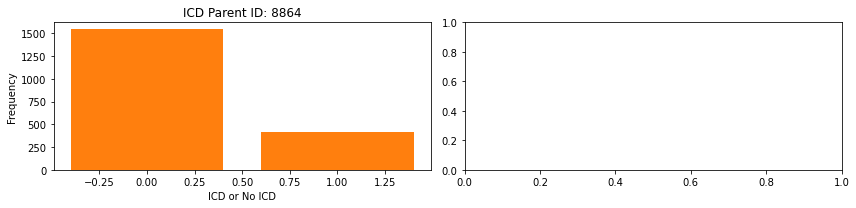

In [85]:
fig, axes = plt.subplots(1,len(pids), figsize=(12,3))
for pid in pids:
    i = 0
    print(pid)
    til = 'ICD Parent ID: ' + pid
    
    axes[i].set_title(til)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('ICD or No ICD')
    y_vals = [target_count[i], target_count[i + 1]]
    x_vals = [0, 1]
    axes[i].bar(x_vals, y_vals)
    i += 2
    print(f'Loop {pid}')
    
fig.tight_layout()
fig.show()
    